In [1]:
####PCA主成分分析
#1.创建数据集的协方差矩阵
#2.计算协方差矩阵的特征值和特征向量
#3.保留前k个特征值
#4.用保留的特征向量转换新的数据

In [2]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
iris = load_iris()

In [4]:
iris_X, iris_y = iris.data, iris.target

In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
iris_X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

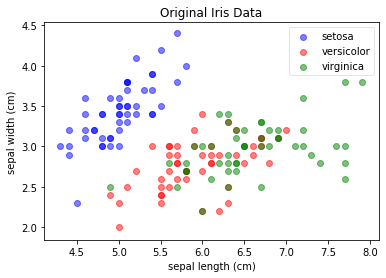

In [8]:
label_dict = {i: k for i, k in enumerate(iris.target_names)}

def plot(X, y, title, x_label, y_label):
    ax = plt.subplot(111)
    for label, marker, color in zip(range(3), ('^', 's', 'o'), ('blue', 'red', 'green')):
        plt.scatter(x=X[:,0].real[y==label], y=X[:,1].real[y == label], color=color, alpha=0.5, label=label_dict[label])
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title(title)

plot(iris_X, iris_y, 'Original Iris Data', 'sepal length (cm)', 'sepal width (cm)')

In [10]:
iris_X[:,0]

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
       6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
       6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
       6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
       6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
       6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
       7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
       7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
       6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9])

In [11]:
##手动计算PCA

import numpy as np 

mean_vector = iris_X.mean(axis=0)
print(mean_vector)

#计算协方差矩阵
cov_mat = np.cov((iris_X).T)

print(cov_mat.shape)

[5.84333333 3.05733333 3.758      1.19933333]
(4, 4)


In [13]:
iris_X.T

array([[5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
        4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
        5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
        5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
        6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
        6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
        6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
        6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
        6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
        7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
        7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
        6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9],
       [3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3. ,
        3. , 4. , 4.4, 3.9, 3.5, 3.8, 3.8, 3.4, 3.7, 3.6, 3.3, 3.4, 3. ,
       

In [14]:
##计算鸢尾花数据集的特征向量和特征值
eig_val_cov, eig_vec_cov = np.linalg.eig(cov_mat)

In [16]:
for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:, i]
    
    print('Eigenvector {}: \n{}'.format(i+1, eigvec_cov))
    print('Eigenvalue {} from covariance matrix: {}'.format(i+1, eig_val_cov[i]))
    print(30 * '-')

Eigenvector 1: 
[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
Eigenvalue 1 from covariance matrix: 4.228241706034863
------------------------------
Eigenvector 2: 
[-0.65658877 -0.73016143  0.17337266  0.07548102]
Eigenvalue 2 from covariance matrix: 0.24267074792863352
------------------------------
Eigenvector 3: 
[-0.58202985  0.59791083  0.07623608  0.54583143]
Eigenvalue 3 from covariance matrix: 0.07820950004291925
------------------------------
Eigenvector 4: 
[ 0.31548719 -0.3197231  -0.47983899  0.75365743]
Eigenvalue 4 from covariance matrix: 0.023835092973449115
------------------------------


In [18]:
##取每个特征向量(主成分)的特征值，将其除以所有特征值的和，计算每个特征向量解释方差的百分比：
###主成分占比
explained_variance_ratio = eig_val_cov/eig_val_cov.sum()
explained_variance_ratio

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

In [22]:
top_2_eigenvectors = eig_vec_cov[:, :2].T

##转置，每行是一个主成分，两行代表两个主成分
top_2_eigenvectors

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [-0.65658877, -0.73016143,  0.17337266,  0.07548102]])

In [20]:
np.dot(iris_X, top_2_eigenvectors.T)[:5,]

array([[ 2.81823951, -5.64634982],
       [ 2.78822345, -5.14995135],
       [ 2.61337456, -5.18200315],
       [ 2.75702228, -5.0086536 ],
       [ 2.7736486 , -5.65370709]])

In [23]:
###sklearn中的PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(iris_X)

pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

In [25]:
pca.transform(iris_X)[:5,]
####sklearn会对数据进行中心化，乘以中心矩阵

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451]])

In [26]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

single_pca = PCA(n_components=1)

#创建一个有判别式的LDA模块
single_lda = LDA(n_components=1)

#实例化knn
knn = KNeighborsClassifier(n_neighbors=3)

knn_average = cross_val_score(knn, iris_X, iris_y).mean()

In [28]:
knn_average

0.9666666666666668

In [29]:
lda_pipeline = Pipeline([('lda', single_lda), ('knn', knn)])

lda_average = cross_val_score(lda_pipeline, iris_X, iris_y).mean()

In [30]:
lda_average

0.9666666666666666

In [31]:
pca_pipeline = Pipeline([('pca', single_pca), ('knn', knn)])

pca_average = cross_val_score(pca_pipeline, iris_X, iris_y).mean()
pca_average

0.9

In [32]:
lda_pipeline = Pipeline([('lda', LDA(n_components=2)), ('knn', knn)])

lda_average = cross_val_score(lda_pipeline, iris_X, iris_y).mean()

lda_average

0.9733333333333334

In [33]:
from sklearn.feature_selection import SelectKBest
for k in [1,2,3]:
    select_pipeline = Pipeline([('select', SelectKBest(k=k)), ('knn', knn)])
    
    select_average = cross_val_score(select_pipeline, iris_X, iris_y).mean()
    print(k, 'best feature has accuracy:', select_average)

1 best feature has accuracy: 0.9533333333333334
2 best feature has accuracy: 0.9533333333333334
3 best feature has accuracy: 0.9733333333333334


In [38]:
from sklearn.model_selection import GridSearchCV

def get_best_model_and_accuracy(model, params, X, y):
    grid = GridSearchCV(model, ##要搜索的模型
                       params, ##要尝试的参数
                       error_score=0.)  ##如果报错，结果是0
    grid.fit(X, y) #拟合模型和参数
    # 性能指标
    print('best accuracy: {}'.format(grid.best_score_))
    # 得到最佳准确率的最佳参数
    print('best parameters:{}'.format(grid.best_params_))
    # 拟合的平均时间(秒)
    print('average time to fit (s): {}'.format(round(grid.cv_results_['mean_fit_time'].mean(), 3)))
    ## 预测的平均时间
    # 从该指标可以看出模型在真实世界的性能
    print("Average Time to Score (s):{}".format(round(grid.cv_results_['mean_score_time'].mean(), 3)))

In [41]:
from sklearn.preprocessing import StandardScaler
iris_params = {'preprocessing__scale__with_std': [True, False],
              'preprocessing__scale__with_mean': [True, False],
              'preprocessing__pca__n_components': [1,2,3,4],
               'preprocessing__lda__n_components':[1,2],
               'clf__n_neighbors': range(1,9)
              }

preprocessing = Pipeline([('scale', StandardScaler()), ('pca', pca), ('lda', LDA())])

iris_pipeline = Pipeline(steps=[('preprocessing', preprocessing), ('clf', KNeighborsClassifier())])

get_best_model_and_accuracy(iris_pipeline, iris_params, iris_X, iris_y)

/Users/lvsongke/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(1, 3 - 1) = 1 components.
  ChangedBehaviorWarning)
/Users/lvsongke/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/Users/lvsongke/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(1, 3 - 1) = 1 components.
  ChangedBehaviorWarning)
/Users/lvsongke/opt/anaconda3/lib/python3.7/site-packages/sklearn/discrimina

/Users/lvsongke/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(1, 3 - 1) = 1 components.
  ChangedBehaviorWarning)
/Users/lvsongke/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/Users/lvsongke/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(1, 3 - 1) = 1 components.
  ChangedBehaviorWarning)
/Users/lvsongke/opt/anaconda3/lib/python3.7/site-packages/sklearn/discrimina

/Users/lvsongke/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(1, 3 - 1) = 1 components.
  ChangedBehaviorWarning)
/Users/lvsongke/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/Users/lvsongke/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(1, 3 - 1) = 1 components.
  ChangedBehaviorWarning)
/Users/lvsongke/opt/anaconda3/lib/python3.7/site-packages/sklearn/discrimina

/Users/lvsongke/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(1, 3 - 1) = 1 components.
  ChangedBehaviorWarning)
/Users/lvsongke/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/Users/lvsongke/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(1, 3 - 1) = 1 components.
  ChangedBehaviorWarning)
/Users/lvsongke/opt/anaconda3/lib/python3.7/site-packages/sklearn/discrimina

/Users/lvsongke/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(1, 3 - 1) = 1 components.
  ChangedBehaviorWarning)
/Users/lvsongke/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/Users/lvsongke/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(1, 3 - 1) = 1 components.
  ChangedBehaviorWarning)
/Users/lvsongke/opt/anaconda3/lib/python3.7/site-packages/sklearn/discrimina

/Users/lvsongke/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(1, 3 - 1) = 1 components.
  ChangedBehaviorWarning)
/Users/lvsongke/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/Users/lvsongke/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(1, 3 - 1) = 1 components.
  ChangedBehaviorWarning)
/Users/lvsongke/opt/anaconda3/lib/python3.7/site-packages/sklearn/discrimina

/Users/lvsongke/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(1, 3 - 1) = 1 components.
  ChangedBehaviorWarning)
/Users/lvsongke/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/Users/lvsongke/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(1, 3 - 1) = 1 components.
  ChangedBehaviorWarning)
/Users/lvsongke/opt/anaconda3/lib/python3.7/site-packages/sklearn/discrimina

/Users/lvsongke/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(1, 3 - 1) = 1 components.
  ChangedBehaviorWarning)
/Users/lvsongke/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/Users/lvsongke/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(1, 3 - 1) = 1 components.
  ChangedBehaviorWarning)
/Users/lvsongke/opt/anaconda3/lib/python3.7/site-packages/sklearn/discrimina

best accuracy: 0.9933333333333334
best parameters:{'clf__n_neighbors': 8, 'preprocessing__lda__n_components': 1, 'preprocessing__pca__n_components': 3, 'preprocessing__scale__with_mean': True, 'preprocessing__scale__with_std': False}
average time to fit (s): 0.002
Average Time to Score (s):0.002


In [42]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])